In [7]:
import pandas as pd

# Load Dataset

In [108]:
train = pd.read_csv('../Titanic/train.csv', index_col='PassengerId')

print(train.shape)
train

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [109]:
test = pd.read_csv('../Titanic/test.csv', index_col='PassengerId')

print(test.shape)
test

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


# Hypothesis for Homework

In [40]:
%matplotlib inline
import seaborn as sns

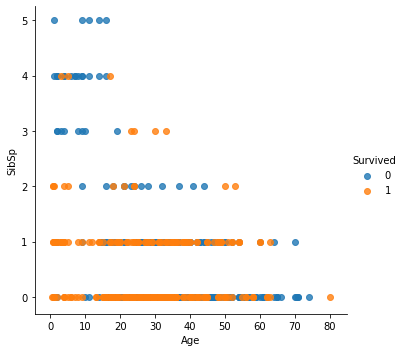

In [42]:
#SibSp and Parch added to the algorithm

sns.lmplot(data=train, x='Age', y='SibSp', hue='Survived', fit_reg=False)

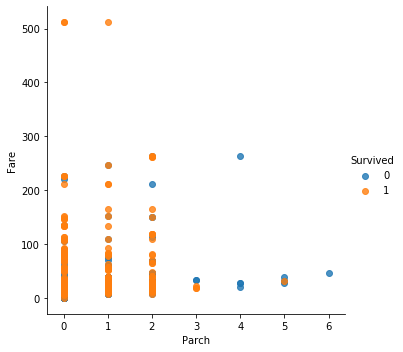

In [44]:
sns.lmplot(data=train, x='Parch', y='Fare', hue='Survived', fit_reg=False)

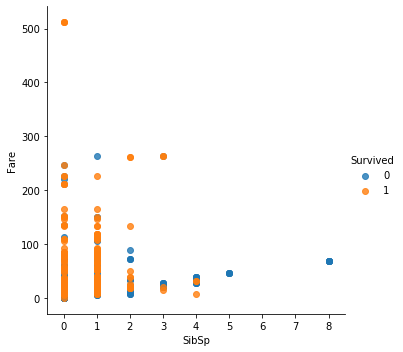

In [45]:
sns.lmplot(data=train, x='SibSp', y='Fare', hue='Survived', fit_reg=False)

In [ ]:
#Parch 0,1,2 have strong survived rate
#SibSp 0,1 have a strong survived rate

# -------------------------------------- Try this theory1
# -------------------------------------- Result = 0.79425

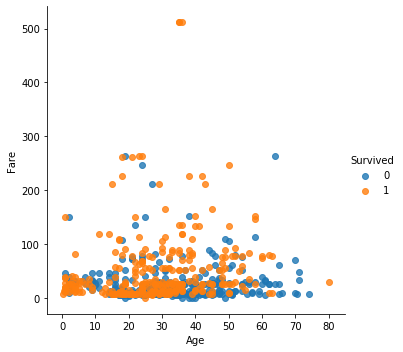

In [130]:
# Now include Age to the Algorithm

sns.lmplot(data=train, x='Age', y='Fare', hue='Survived', fit_reg=False)

In [131]:
#Divide Age into three groups (0-10, 11-40, and above)

# -------------------------------------- Try this theory2
# -------------------------------------- Result = 0.78947

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


In [174]:
# Divide Age into two groups (0-10, above)

# -------------------------------------- Try this theory3
# -------------------------------------- Result = 0.80861
# Best

In [ ]:
# Just plug everything in as is 
# Just setting Max Depth

# -------------------------------------- Try this theory4
# -------------------------------------- Result = 0.74162
# TOTAL SHIT  

# Preprocessing

### Change male to 0 and female to 1

In [110]:
train['Sex_encode'] = train['Sex'].replace('male',0).replace('female',1)

#train.loc[train['Sex'] == 'male', 'Sex_encode'] = 0
#train.loc[train['Sex'] == 'female', 'Sex_encode'] = 1

train[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [111]:
test['Sex_encode'] = test['Sex'].replace('male',0).replace('female',1)

#test.loc[test['Sex'] == 'male', 'Sex_encode'] = 0
#test.loc[test['Sex'] == 'female', 'Sex_encode'] = 1

test[['Sex','Sex_encode']].head()

,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


### Fill in Blank for Fare

In [112]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [113]:
test['Fare'] = test['Fare'].fillna(0)

test[test['Fare'].isnull()]
test[test['Fare'] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,0.0,NaN,S,0
1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,0
1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,0


### Encode Embark by One Hot Encoding

In [114]:
''' 
C = [1,0,0] = [True, False, False]
S = [0,1,0] = [False, True, False]
Q = [0,0,1] = [False, False, True]
'''

train['Embarked_C'] = (train['Embarked'] == 'C')
train['Embarked_S'] = (train['Embarked'] == 'S')
train['Embarked_Q'] = (train['Embarked'] == 'Q')

print(train.shape)
train[['Embarked','Embarked_C','Embarked_S','Embarked_Q']]

(891, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False
...,...,...,...,...
887,S,False,True,False
888,S,False,True,False
889,S,False,True,False


In [115]:
test['Embarked_C'] = (test['Embarked'] == 'C')
test['Embarked_S'] = (test['Embarked'] == 'S')
test['Embarked_Q'] = (test['Embarked'] == 'Q')

print(test.shape)
test[['Embarked','Embarked_C','Embarked_S','Embarked_Q']]

(418, 14)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False
...,...,...,...,...
1305,S,False,True,False
1306,C,True,False,False
1307,S,False,True,False


# Theory 1 (SibSp, Parch) 

In [118]:
# Divide SibSp and Parch into High, Low
# For SibSp (0,1) = Low , (2 and above) = High
# For Parch (0,1,2) = Low, (3 and above) = High 
# Low = 0, High = 1

#Preprocessing
train.loc[train['SibSp'] < 2, 'SibSp_encode'] = 0
train.loc[train['SibSp'] >= 2, 'SibSp_encode'] = 1
train['SibSp_encode'] = train['SibSp_encode'].astype(int)

train.loc[train['Parch'] < 3, 'Parch_encode'] = 0
train.loc[train['Parch'] >= 3, 'Parch_encode'] = 1
train['Parch_encode'] = train['Parch_encode'].astype(int)

train[['SibSp','SibSp_encode','Parch','Parch_encode']].head(20)

#train[train['SibSp'].isnull() == True]
#train[train['Parch'].isnull() == True]

,SibSp,SibSp_encode,Parch,Parch_encode
PassengerId,,,,
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,1,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,3,1,1,0
9,0,0,2,0


In [132]:
test.loc[test['SibSp'] < 2, 'SibSp_encode'] = 0
test.loc[test['SibSp'] >= 2, 'SibSp_encode'] = 1
test['SibSp_encode'] = test['SibSp_encode'].astype(int)

test.loc[test['Parch'] < 3, 'Parch_encode'] = 0
test.loc[test['Parch'] >= 3, 'Parch_encode'] = 1
test['Parch_encode'] = test['Parch_encode'].astype(int)

test[['SibSp','SibSp_encode','Parch','Parch_encode']].head(20)

#test[test['SibSp'].isnull() == True]
#test[test['Parch'].isnull() == True]

,SibSp,SibSp_encode,Parch,Parch_encode
PassengerId,,,,
892,0,0,0,0
893,1,0,0,0
894,0,0,0,0
895,0,0,0,0
896,1,0,1,0
897,0,0,0,0
898,0,0,0,0
899,1,0,1,0
900,0,0,0,0


# Theory 2 (Divide Age into 3 groups)

In [137]:
# Fill in NaN (with age 50 (since they have strong possibility of dying))
# Divide Age into Three Groups (0-10, 11-40, above)
# One Hot Encoding (Age_young, Age_med, Age_old)

train[train['Age'].isnull()]
train['Age'] = train['Age'].fillna(50)

#Preprocessing
train['Age_young'] = (train['Age'] <=10)
train['Age_med'] = ((train['Age'] > 11) & (train['Age'] <=40))
train['Age_old'] = (train['Age'] > 41)

train[['Age','Age_young', 'Age_med','Age_old']].head(20)

,Age,Age_young,Age_med,Age_old
PassengerId,,,,
1,22.0,False,True,False
2,38.0,False,True,False
3,26.0,False,True,False
4,35.0,False,True,False
5,35.0,False,True,False
6,50.0,False,False,True
7,54.0,False,False,True
8,2.0,True,False,False
9,27.0,False,True,False


In [138]:
test[test['Age'].isnull()]
test['Age'] = test['Age'].fillna(50)

#Preprocessing
test['Age_young'] = (test['Age'] <=10)
test['Age_med'] = ((test['Age'] > 11) & (test['Age'] <=40))
test['Age_old'] = (test['Age'] > 41)

test[['Age','Age_young', 'Age_med','Age_old']].head(20)

,Age,Age_young,Age_med,Age_old
PassengerId,,,,
892,34.5,False,True,False
893,47.0,False,False,True
894,62.0,False,False,True
895,27.0,False,True,False
896,22.0,False,True,False
897,14.0,False,True,False
898,30.0,False,True,False
899,26.0,False,True,False
900,18.0,False,True,False


# Theory 3 (Divide age into 2 groups) 

In [163]:
train['Age_y'] = (train['Age'] <=10)
train['Age_o'] = (train['Age'] > 11)

train[['Age','Age_y','Age_o']].head(20)

,Age,Age_y,Age_o
PassengerId,,,
1,22.0,False,True
2,38.0,False,True
3,26.0,False,True
4,35.0,False,True
5,35.0,False,True
6,50.0,False,True
7,54.0,False,True
8,2.0,True,False
9,27.0,False,True


In [164]:
test['Age_y'] = (test['Age'] <=10)
test['Age_o'] = (test['Age'] > 11)

test[['Age','Age_y','Age_o']].head(20)

,Age,Age_y,Age_o
PassengerId,,,
892,34.5,False,True
893,47.0,False,True
894,62.0,False,True
895,27.0,False,True
896,22.0,False,True
897,14.0,False,True
898,30.0,False,True
899,26.0,False,True
900,18.0,False,True


# Theory 4 (Plugging everything in as-is)

In [175]:
feature_names_1 = ['Pclass', 
                 'Sex_encode', 
                 'Fare', 
                 'Embarked_C', 
                 'Embarked_S', 
                 'Embarked_Q',
                 'SibSp',
                 'Parch',
                   'Age'
]

feature_names_1

['Pclass',
 'Sex_encode',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'SibSp',
 'Parch',
 'Age']

# Train

In [165]:
feature_names = ['Pclass', 
                 'Sex_encode', 
                 'Fare', 
                 'Embarked_C', 
                 'Embarked_S', 
                 'Embarked_Q',
                 'SibSp_encode',
                 'Parch_encode',
                 'Age_y',
                 'Age_o'
]
feature_names

['Pclass',
 'Sex_encode',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'SibSp_encode',
 'Parch_encode',
 'Age_y',
 'Age_o']

In [176]:
x_train = train[feature_names]

print(x_train.shape)
x_train.head()

(891, 9)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_S,Embarked_Q,SibSp,Parch,Age
PassengerId,,,,,,,,,
1,3,0,7.2500,False,True,False,1,0,22.0
2,1,1,71.2833,True,False,False,1,0,38.0
3,3,1,7.9250,False,True,False,0,0,26.0
4,1,1,53.1000,False,True,False,1,0,35.0
5,3,0,8.0500,False,True,False,0,0,35.0


In [178]:
x_test = test[feature_names]

print(x_test.shape)


(418, 9)


In [179]:
label_name = 'Survived'

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Use Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)

In [181]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [182]:
prediction = model.predict(x_test)

prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Submission

In [183]:
submit = pd.read_csv('../Titanic/gender_submission.csv', index_col = 'PassengerId')

submit['Survived'] = prediction
submit

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [184]:
# Save
submit.to_csv('decision-tree-hw-4.csv')